# Calibration de la température
Ici, plutôt qu'un script complet, on donne une suite de fractions de scripts
## Question 1

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import cv2 as cv
import sys


# Programme principal
if __name__ == "__main__":
    # lecture des températures
    temperatures = np.genfromtxt("exo10-Result_temp_calibration.txt", delimiter=",")
    # numéro d'expérience de 1 à 699
    runno = 1 + np.arange(temperatures.size)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    ax.plot(runno, temperatures, ls="-")
    ax.set_xlabel("Runno")
    ax.set_ylabel("Température")
    plt.show()

ImportError: /lib/x86_64-linux-gnu/libatspi.so.0: undefined symbol: g_once_init_leave_pointer

## Questions 2 à 5

(5120, 5120)
uint16
(5120, 5120, 3)
uint8


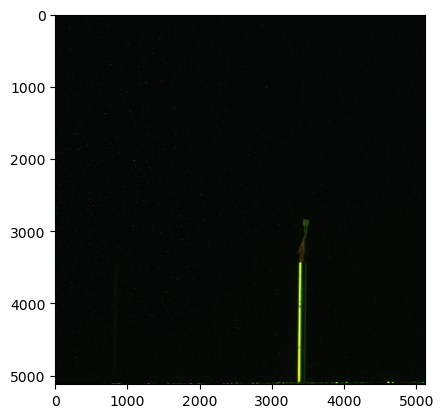

In [24]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import cv2
import sys


# Programme principal
if __name__ == "__main__":
    # question2 Lecture
    img_raw = cv2.imread(
        "/home/mverot/Téléchargements/Cours/python/RGB/Run_300/img-cam0-00001.png",
        cv2.IMREAD_UNCHANGED,
    )
    img_arr = np.array(img_raw).shape
    # question 3 Forme du tableau retourné
    # image de 5120 pixels par 5120 pixels
    print(img_raw.shape)
    # image de type 16 bit monocanal
    print(img_raw.dtype)

    # question 4 : passage en RGB
    img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BayerGR2RGB)
    print(np.array(img_rgb).shape)

    # Question 5 :
    img_rgb_8bits = np.array(img_rgb // 16, dtype=np.uint8)  # conversion 4096 -> 256
    print(img_rgb_8bits.dtype)
    fig, ax = plt.subplots()
    im = ax.imshow(img_rgb_8bits)
    plt.savefig("exo9-img-8bit.png")
    plt.show()

In [5]:
for i in range(3):
    # counts,bins,bars = plt.hist(img_rgb[:,:,i].flatten(),bins = 10 * np.arange(490))
    # Bin_reduced = bins[:-1]
    # plt.show()
    pass

## Question 6

In [6]:
def correct_picture(
    img_path,
    k=np.array([1.75, 1.0, 2.75]),
    b=np.array([108.61197591026168, 80.8944685895217, 167.05524770245015]),
):
    """
    img est le chemin vers l'image
    k est un vecteur à 3 composantes contenant les facteurs multiplicatifs
       pour corriger la linéarité du capteur
    b est un vecteur à 3 composantes pour corriger le noir

    retourne l'image corrigée, les pixels sont passés en noir si jamais
    une de leur composante R,G ou B est négative
    """
    # Lecture
    img_raw = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    # conversion en RGB
    img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BayerGR2RGB)
    # Correction des composantes, ATTENTION à la conversion de type
    img_rgb_corrected = np.array(img_rgb.astype(np.float64) * k - b)
    # passage en noir (R=0,G=0,B=0) des pixels ayant une de leurs trois composantes négatives
    img_rgb_corrected[
        (img_rgb_corrected[:, :, 0] < 0)
        | (img_rgb_corrected[:, :, 1] < 0)
        | (img_rgb_corrected[:, :, 2] < 0)
    ] = np.array([0, 0, 0])
    return img_rgb_corrected.astype(np.uint16)

## Question 7 

In [ ]:
def convert_to8bit_thresh(img, thresh=500):
    """
    img est un tableau correspondant à une image
    thresh est le seuil au delà duquel on écrète la valeur pour mieux voir les faibles luminosités
    retourne l'image corrigée
    """
    # On écrète les valeurs supérieures au seuil
    img[img > thresh] = thresh
    # Ici, ATTENTION au typage des données, on doit forcer le type float pour le calcul, donc soit utiliser
    # astype(np.float64), soit multiplier par 255. (et PAS 255) pour forcer le type flottant
    return np.array(img.astype(np.float64) * 255.0 / thresh, dtype=np.uint8)

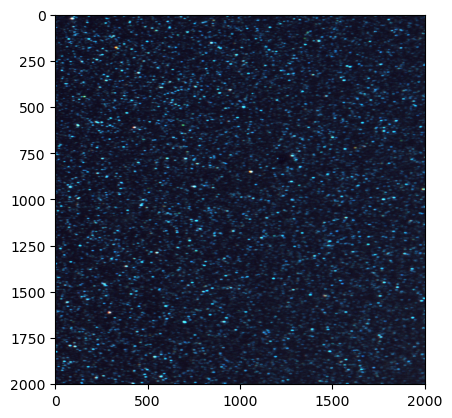

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import cv2
import sys


# Programme principal
if __name__ == "__main__":
    # k = np.array([1.75, 1.0, 2.75])
    # b = np.array([108.61197591026168, 80.8944685895217, 167.05524770245015])
    img_corrected = correct_picture(
        "/home/mverot/Téléchargements/Cours/python/RGB/Run_300/img-cam0-00001.png"
    )
    img_rgb_8bits = convert_to8bit_thresh(img_corrected)
    fig, ax = plt.subplots()
    im = ax.imshow(img_rgb_8bits[2000:4001, 1000:3001])
    plt.savefig("exo9-img-8bit-thresh.png")
    plt.show()

## Question 8 

Ici, on a juste ajouté plus tôt le slicing dans la fonction

In [8]:
def correct_picture(
    img_path,
    k=np.array([1.75, 1.0, 2.75]),
    b=np.array([108.61197591026168, 80.8944685895217, 167.05524770245015]),
):
    """
    img est le chemin vers l'image
    k est un vecteur à 3 composantes contenant les facteurs multiplicatifs
       pour corriger la linéarité du capteur
    b est un vecteur à 3 composantes pour corriger le noir

    retourne l'image corrigée, les pixels sont passés en noir si jamais
    une de leur composante R,G ou B est négative
    """
    # Lecture
    img_raw = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    # slicing pour réduire les calculs par la suite
    img_raw = img_raw[2000:4001, 1000:3001]
    # conversion en RGB
    img_rgb = cv2.cvtColor(img_raw, cv2.COLOR_BayerGR2RGB)
    # Correction des composantes, ATTENTION à la conversion de type
    img_rgb_corrected = np.array(img_rgb.astype(np.float64) * k - b)
    # passage en noir (R=0,G=0,B=0) des pixels ayant une de leurs trois composantes négatives
    img_rgb_corrected[
        (img_rgb_corrected[:, :, 0] < 0)
        | (img_rgb_corrected[:, :, 1] < 0)
        | (img_rgb_corrected[:, :, 2] < 0)
    ] = np.array([0, 0, 0])
    return img_rgb_corrected.astype(np.uint16)

## Question 9

In [9]:
# création des indices
run_starts = np.arange(300, 600, 30)
# on les met en colonne pour le rendre broadcastable
run = np.expand_dims(run_starts, axis=1)
# on ajoute ensuite individuellement à chaque élément
run = run + np.arange(10)
# on repasse en tableau aplati.
run = run.flatten()
print(run)

[300 301 302 303 304 305 306 307 308 309 330 331 332 333 334 335 336 337
 338 339 360 361 362 363 364 365 366 367 368 369 390 391 392 393 394 395
 396 397 398 399 420 421 422 423 424 425 426 427 428 429 450 451 452 453
 454 455 456 457 458 459 480 481 482 483 484 485 486 487 488 489 510 511
 512 513 514 515 516 517 518 519 540 541 542 543 544 545 546 547 548 549
 570 571 572 573 574 575 576 577 578 579]


## Question 10

0 0 0
1 0 1
2 1 0
3 1 1
4 2 0
5 2 1
6 3 0
7 3 1
8 4 0
9 4 1


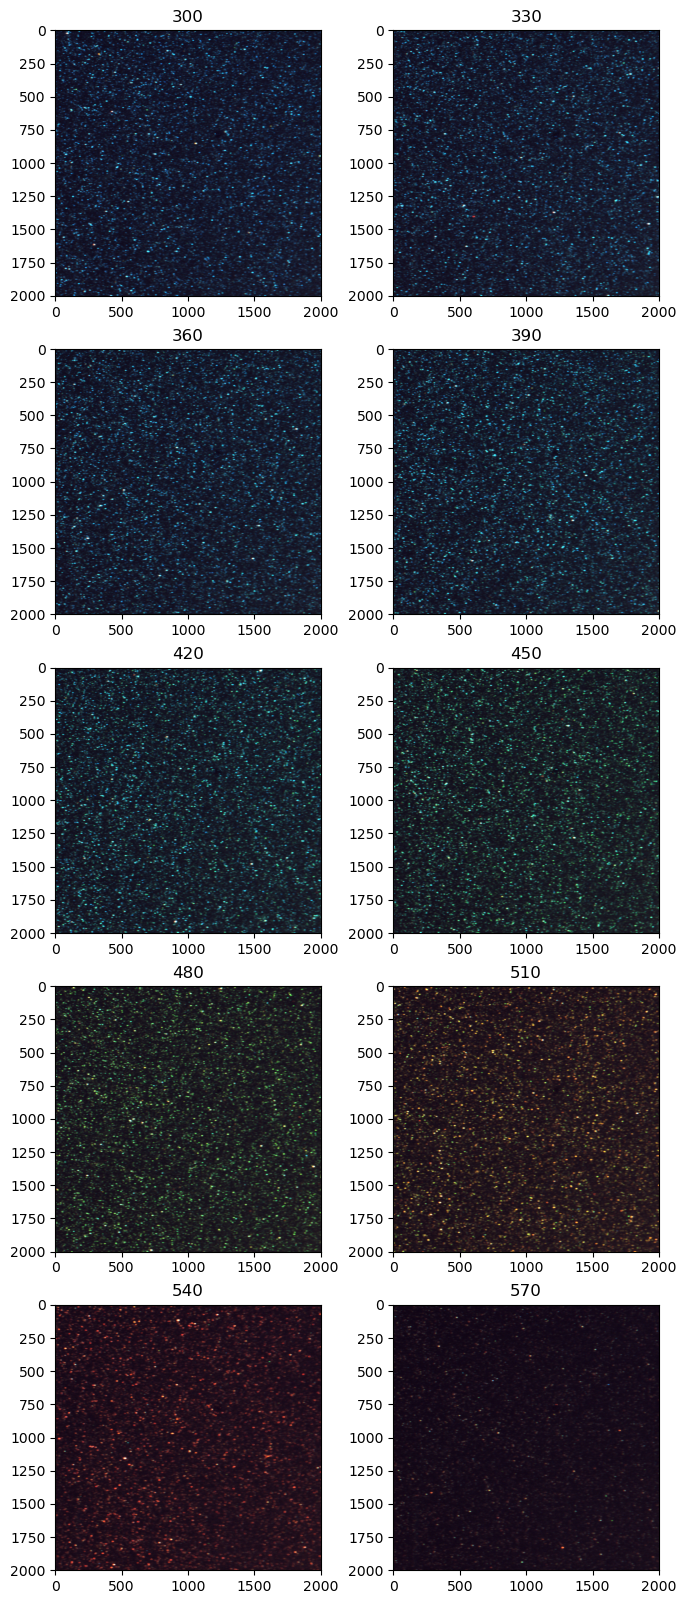

In [25]:
fig = plt.figure(figsize=(8, 20))
gs = fig.add_gridspec(5, 2)
for i, runno in enumerate(run_starts):
    # on joue sur la quotient et le modulo pour automatiser le positionnement des graphiques
    # par exemple, pour le jeu de données n°3, on finit en coordonnées (1,1)
    row_indix = i // 2
    col_indix = i % 2
    print(i, row_indix, col_indix)

    axi = fig.add_subplot(gs[row_indix, col_indix])
    img_corrected = correct_picture(
        "/home/mverot/Téléchargements/Cours/python/RGB/Run_{}/img-cam0-00001.png".format(
            runno
        )
    )
    img_rgb_8bits = convert_to8bit_thresh(img_corrected)

    axi.set_title(runno)
    im = axi.imshow(img_rgb_8bits)

plt.savefig("exo9-img-8bit-thresh-lot.png")

plt.show()

## Question 11

0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 1 0
6 1 1
7 1 2
8 1 3
9 1 4


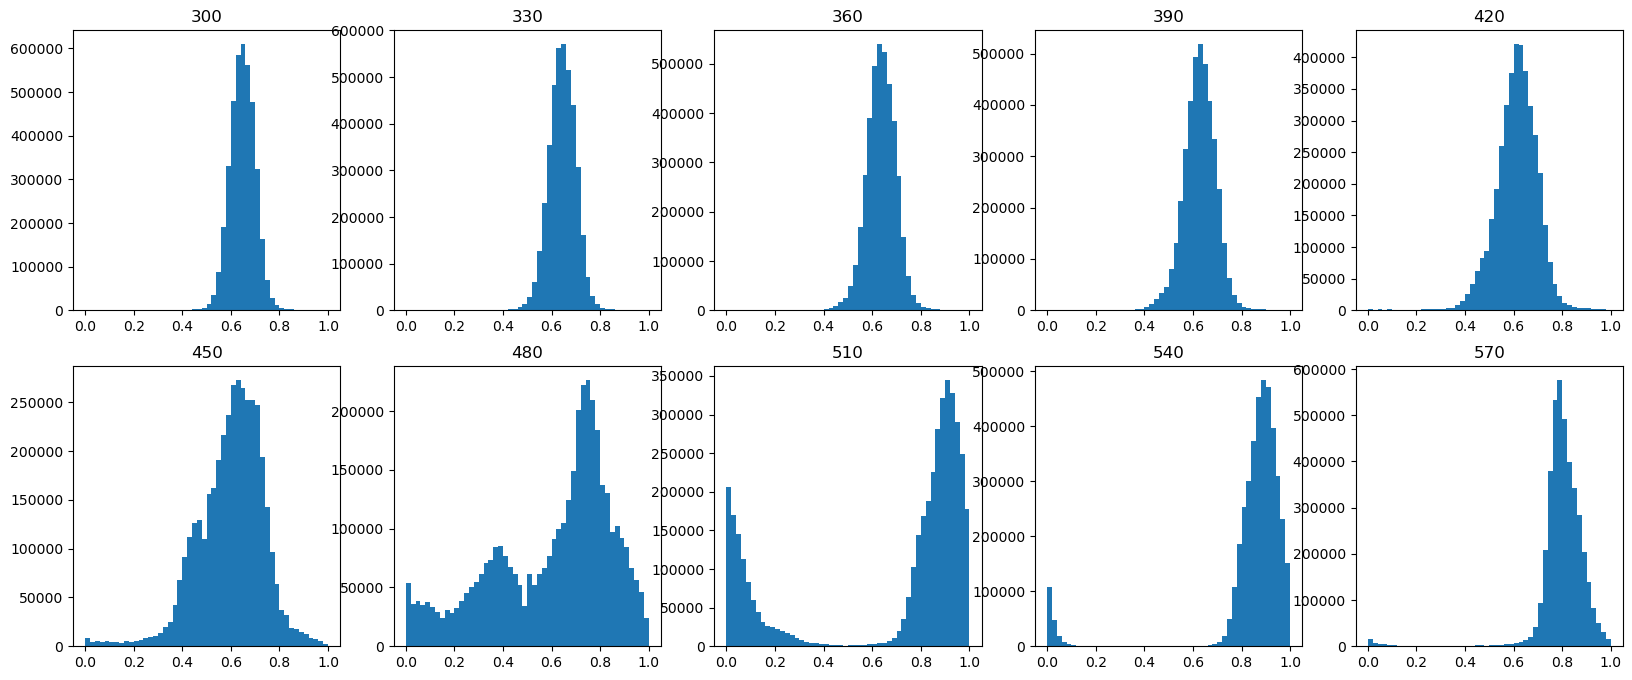

In [11]:
from skimage.color import rgb2hsv

fig = plt.figure(figsize=(20, 8))
gs = fig.add_gridspec(2, 5)
for i, runno in enumerate(run_starts):
    # on joue sur la quotient et le modulo pour automatiser le positionnement des graphiques
    # par exemple, pour le jeu de données n°3, on finit en coordonnées (1,1)
    row_indix = i // 5
    col_indix = i % 5
    print(i, row_indix, col_indix)

    axi = fig.add_subplot(gs[row_indix, col_indix])
    img_corrected = correct_picture(
        "/home/mverot/Téléchargements/Cours/python/RGB/Run_{}/img-cam0-00001.png".format(
            runno
        )
    )
    # Conversion en composante hsv
    img_hsv = rgb2hsv(img_corrected)
    # sélection de la teinte
    hue = img_hsv[:, :, 0]
    axi.set_title(runno)
    # tracé de l'histogramme
    im = axi.hist(hue.flatten(), bins=np.linspace(0, 1, 51))


# plt.tight_layout()
plt.savefig("exo9-img-hue-lot.png")

plt.show()

## Question 12

In [12]:
from skimage.color import rgb2hsv


def threshold_luminosite(img, seuil=300):
    """
    img : image de type RGB
    seuil seuil de luminosité à dépasser

    retourne
    * la luminostié définie comme la moyenne des composantes R G et B pour chaque pixel
    * le nombre de pixels dépassant le seuil défini
    """
    luminosite = np.mean(img, axis=-1)
    count = np.count_nonzero(luminosite > seuil)
    return luminosite, count


for i, runno in enumerate(run_starts):
    img_corrected = correct_picture(
        "/home/mverot/Téléchargements/Cours/python/RGB/Run_{}/img-cam0-00001.png".format(
            runno
        )
    )
    # calcul de la luminosité
    luminosite, count = threshold_luminosite(img_corrected, seuil=300)
    print("experiment number : {} count : {}".format(runno, count))

experiment number : 300 count : 29061
experiment number : 330 count : 28108
experiment number : 360 count : 32716
experiment number : 390 count : 39663
experiment number : 420 count : 41374
experiment number : 450 count : 32165
experiment number : 480 count : 24556
experiment number : 510 count : 20606
experiment number : 540 count : 5181
experiment number : 570 count : 649


## Question 13

In [19]:
from skimage.color import rgb2hsv


def teinte(img_path, seuil=300):
    """
    img : image de type RGB
    seuil seuil de luminosité à dépasser

    retourne
    * la teinte moyenne pour les pixels ayant une luminosité supérieure à la valeur seuil

    la luminosité est définie comme la valeur moyenne des composantes R, G et B
    """
    img = correct_picture(img_path)
    luminosite = np.average(img, axis=-1)
    # autre calcul mais qui nécessite de faire de la conversion de type pour éviter un overflow
    # luminosite= np.array((img[:,:,0].astype(np.float64)+img[:,:,1].astype(np.float64)  +img[:,:,2].astype(np.float64) )/3.,dtype=np.float64)

    # Conversion en composante hsv
    img_hsv = rgb2hsv(img)
    # sélection de la teinte
    hue = img_hsv[:, :, 0]
    return np.mean(hue[luminosite > seuil])


teintes = np.array(
    [
        teinte(
            "/home/mverot/Téléchargements/Cours/python/RGB/Run_{}/img-cam0-00001.png".format(
                runno
            ),
            seuil=300,
        )
        for runno in run_starts
    ]
)

In [20]:
for i, runno in enumerate(run_starts):
    print("experiment number : {} teinte : {}".format(runno, teintes[i]))

experiment number : 300 teinte : 0.5463026280278536
experiment number : 330 teinte : 0.5363894995487174
experiment number : 360 teinte : 0.5249128372747327
experiment number : 390 teinte : 0.517629225790177
experiment number : 420 teinte : 0.4865267723295474
experiment number : 450 teinte : 0.4322647949176736
experiment number : 480 teinte : 0.3482885466779284
experiment number : 510 teinte : 0.18191676376550509
experiment number : 540 teinte : 0.10296949443392385
experiment number : 570 teinte : 0.28199514211808296


## Question 14

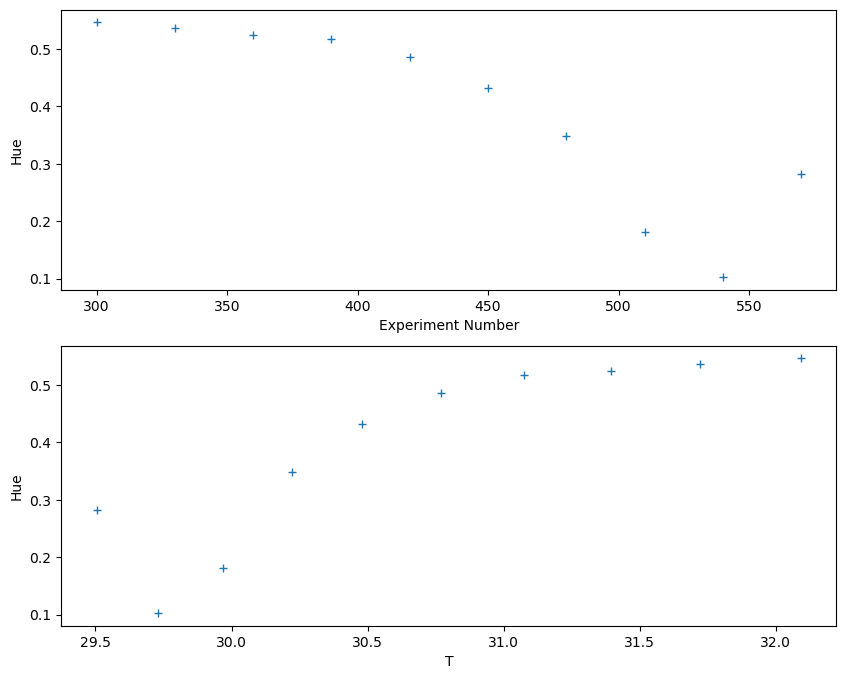

In [23]:
fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(run_starts, teintes, "+")
ax1.set_xlabel("Experiment Number")
ax1.set_ylabel("Hue")
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(temperatures[run_starts], teintes, "+")
ax2.set_xlabel("T")
ax2.set_ylabel("Hue")
plt.savefig("final.png")
plt.show()

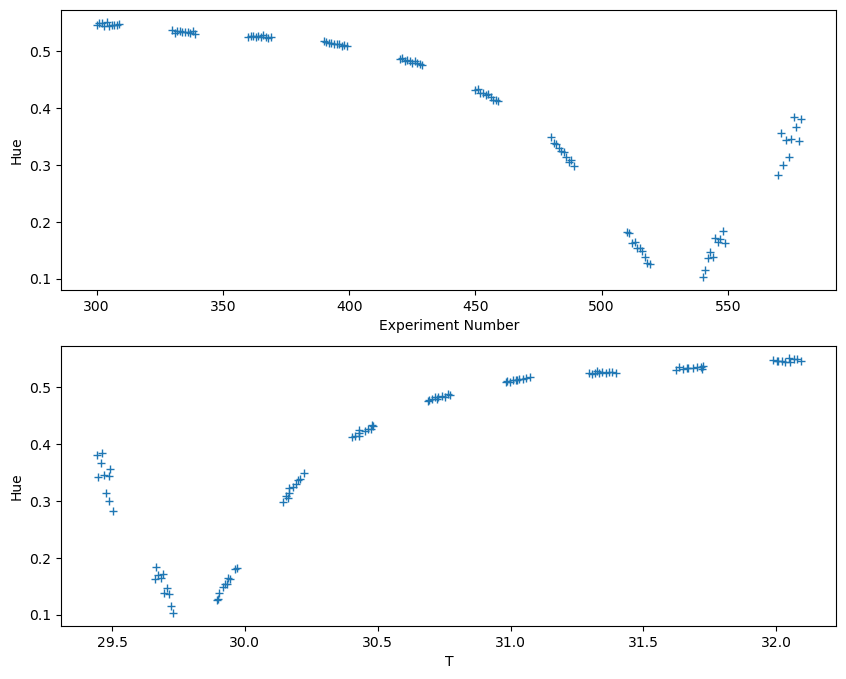

In [26]:
teintes_full = np.array(
    [
        teinte(
            "/home/mverot/Téléchargements/Cours/python/RGB/Run_{}/img-cam0-00001.png".format(
                runno
            ),
            seuil=300,
        )
        for runno in run
    ]
)

fig = plt.figure(figsize=(10, 8))
gs = fig.add_gridspec(2, 1)

ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(run, teintes_full, "+")
ax1.set_xlabel("Experiment Number")
ax1.set_ylabel("Hue")
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(temperatures[run], teintes_full, "+")
ax2.set_xlabel("T")
ax2.set_ylabel("Hue")
plt.savefig("final.png")
plt.show()